In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import mplfinance as mpf

In [4]:
file_path = "BTCUSDT.csv"
headers = ["Open Time", "Open", "High", "Low", "Close", "Volume", "Close Time", "QAV", "NAT", "TBBAV", "TBQAV", "Ignore"]
df = pd.read_csv(file_path, names=headers)

In [5]:
# Convertir el tiempo de apertura a formato de fecha
df["Open Time"] = pd.to_datetime(df["Open Time"], unit='ms')

# Ordenar por tiempo por si acaso
df = df.sort_values(by="Open Time").reset_index(drop=True)

# Ver información general
print(df.info())
print(df.describe())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 65245 entries, 0 to 65244
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   Open Time   65245 non-null  datetime64[ns]
 1   Open        65245 non-null  float64       
 2   High        65245 non-null  float64       
 3   Low         65245 non-null  float64       
 4   Close       65245 non-null  float64       
 5   Volume      65245 non-null  float64       
 6   Close Time  65245 non-null  int64         
 7   QAV         65245 non-null  float64       
 8   NAT         65245 non-null  int64         
 9   TBBAV       65245 non-null  float64       
 10  TBQAV       65245 non-null  float64       
 11  Ignore      65245 non-null  int64         
dtypes: datetime64[ns](1), float64(8), int64(3)
memory usage: 6.0 MB
None
                           Open Time           Open           High  \
count                          65245   65245.000000   65245.000000   
mean 

Evolución del precio de cierre

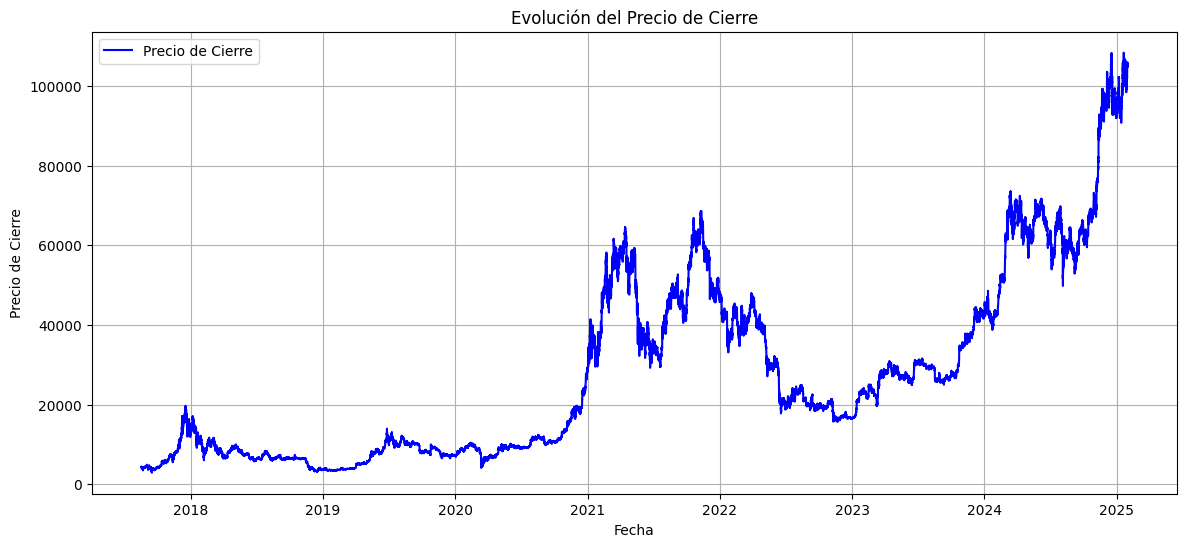

In [6]:
plt.figure(figsize=(14, 6))
plt.plot(df["Open Time"], df["Close"], label="Precio de Cierre", color='blue')
plt.xlabel("Fecha")
plt.ylabel("Precio de Cierre")
plt.title("Evolución del Precio de Cierre")
plt.legend()
plt.grid()
plt.show()

Esta gráfica muestra la evolución del precio del activo a lo largo del tiempo. Se pueden identificar tendencias alcistas y bajistas, así como períodos de consolidación en los que el precio se mantiene estable dentro de un rango.
Algo a destacar son los períodos de estabilidad, ya que estos pueden generar dificultades en la predicción, ya que el modelo podría predecir valores muy similares sin captar cambios significativos. Por otro lado, cuando cuando el precio presenta tendencias claras, el modelo LSTM podrá aprender mejor los patrones.

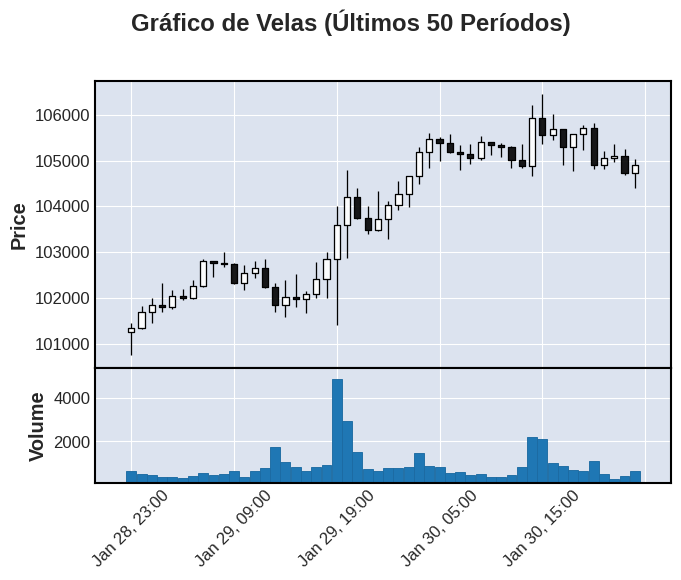

In [7]:
df_candlestick = df[["Open Time", "Open", "High", "Low", "Close", "Volume"]].set_index("Open Time")
mpf.plot(df_candlestick.tail(50), type="candle", volume=True, title="Gráfico de Velas (Últimos 50 Períodos)")

El gráfico de velas nos puede ayudar para analizar la acción del precio en períodos cortos. Con este gráfico es posible detectar patrones que pueden indicar reversiones de tendencia. Si predominan velas con cuerpos largos, se evidencia una tendencia clara, mientras que sombras largas pueden indicar indecisión en el mercado. Estos patrones pueden ser utilizados para complementar el modelo LSTM incorporando datos sobre máximos y mínimos, y no solo el precio de cierre, lo que ayudaría a capturar mejor la dinámica del mercado.



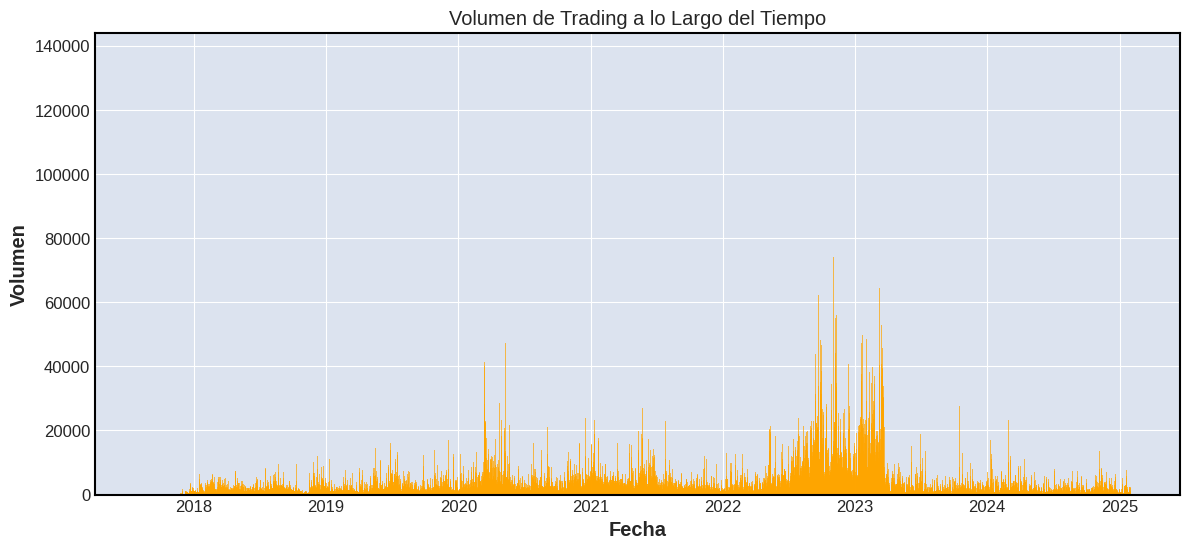

In [8]:
plt.figure(figsize=(14, 6))
plt.bar(df["Open Time"], df["Volume"], color='orange', alpha=0.7)
plt.xlabel("Fecha")
plt.ylabel("Volumen")
plt.title("Volumen de Trading a lo Largo del Tiempo")
plt.show()

El gráfico de volumen nos permite ver la cantidad de activos intercambiados en cada período. Se puede notar que los incrementos en volumen suelen coincidir con movimientos bruscos en el precio, lo que indica un mayor interés del mercado en determinados momentos. Un volumen alto antes de un movimiento fuerte puede señalar fases de acumulación o distribución. Por otro lado, un volumen bajo sugiere menor interés y puede estar relacionado con una menor volatilidad en el precio. Esto nos proporciona información clave sobre la actividad del mercado.

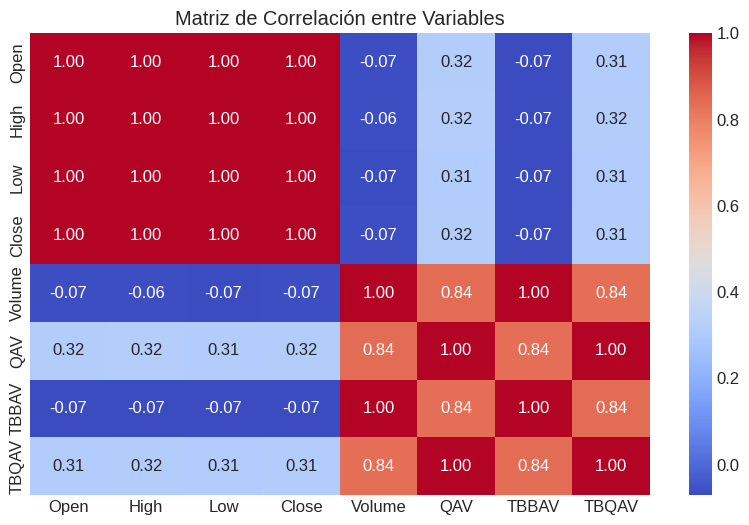

In [9]:
plt.figure(figsize=(10, 6))
sns.heatmap(df[["Open", "High", "Low", "Close", "Volume", "QAV", "TBBAV", "TBQAV"]].corr(), annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Matriz de Correlación entre Variables")
plt.show()

Este análisis de correlación entre variables nos ayuda a identificar relaciones entre los distintos valores de precios y el volumen de trading. Como era de esperarse, los precios de apertura, máximo, mínimo y cierre están altamente correlacionados entre sí. Sin embargo, el volumen presenta una correlación más variable con los precios, lo que sugiere que en ciertos momentos puede ser un indicador importante de cambios de tendencia. Reducir la cantidad de variables redundantes en el modelo LSTM puede ayudar a mejorar su eficiencia sin perder información clave.

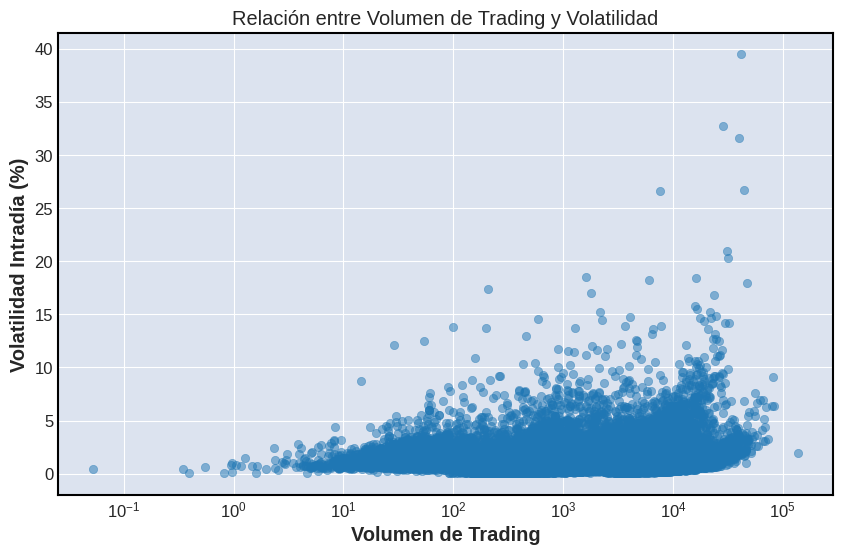

In [14]:
df['Volatility (%)'] = ((df['High'] - df['Low']) / df['Low']) * 100

# Crear el gráfico de dispersión entre volumen y volatilidad
plt.figure(figsize=(10,6))
sns.scatterplot(x=df['Volume'], y=df['Volatility (%)'], alpha=0.5, edgecolor=None)

plt.xscale("log")  # Escala logarítmica para manejar diferencias grandes en volumen
plt.xlabel("Volumen de Trading")
plt.ylabel("Volatilidad Intradía (%)")
plt.title("Relación entre Volumen de Trading y Volatilidad")
plt.grid(True)
plt.show()

Cada punto en el gráfico representa un período de tiempo (por ejemplo, 1 hora o 1 día, dependiendo de los datos).
- El eje X representa el volumen de trading, es decir, cuántas unidades del activo se negociaron en ese período.
- El eje Y representa la volatilidad intradía (%), que mide cuánto cambió el precio dentro de ese período.

Notamos que a mayor volumen hay mayor volatilidad, significa que el mercado tiende a moverse con más fuerza cuando hay más actividad de trading. Esto podría indicar que en momentos de alto volumen, el modelo LSTM debería prestar especial atención, ya que estos períodos pueden ser más impredecibles.

Por otro lado, la volatilidad no cambia mucho con el volumen, significa que las fluctuaciones de precio no dependen tanto de la cantidad de operaciones en el mercado, sino de otros factores externos.